In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Install required packages**

In [11]:
!pip install wandb torch torchvision pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# **Upload Kaggle**

In [12]:
!pip install kaggle

In [13]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"teklats","key":"1345342362a73d78c62a2b2f4808b50a"}'}

In [14]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [15]:
!/content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json

/bin/bash: line 1: /content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json: No such file or directory


In [16]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge


 97% 278M/285M [00:01<00:00, 193MB/s]
100% 285M/285M [00:01<00:00, 236MB/s]


In [17]:
!unzip -q challenges-in-representation-learning-facial-expression-recognition-challenge.zip

# **Connect Wandb**

In [18]:
import wandb
wandb.login()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tekla-tsutskha (tekla-tsutskha-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [19]:
wandb.init(
    project="facial-expression",
    name="data_exploration",
    job_type="data_analysis"
)

In [20]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image

# **Load Data**

In [22]:
!ls /content/

01_data_exploration_and_setup.ipynb
challenges-in-representation-learning-facial-expression-recognition-challenge.zip
drive
example_submission.csv
fer2013.tar.gz
icml_face_data.csv
sample_data
test.csv
train.csv
wandb


In [23]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

print("Dataset Shape:")
print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")

print(f"Columns: {train_df.columns.tolist()}")
print(f"Emotion distribution:")
print(train_df['emotion'].value_counts())

print(f"Dataset shape: {test_df.shape}")
print(f"Columns: {test_df.columns.tolist()}")

Dataset Shape:
Training set: (28709, 2)
Test set: (7178, 1)
Columns: ['emotion', 'pixels']
Emotion distribution:
emotion
3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: count, dtype: int64
Dataset shape: (7178, 1)
Columns: ['pixels']


# **Analyze**


In [24]:
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

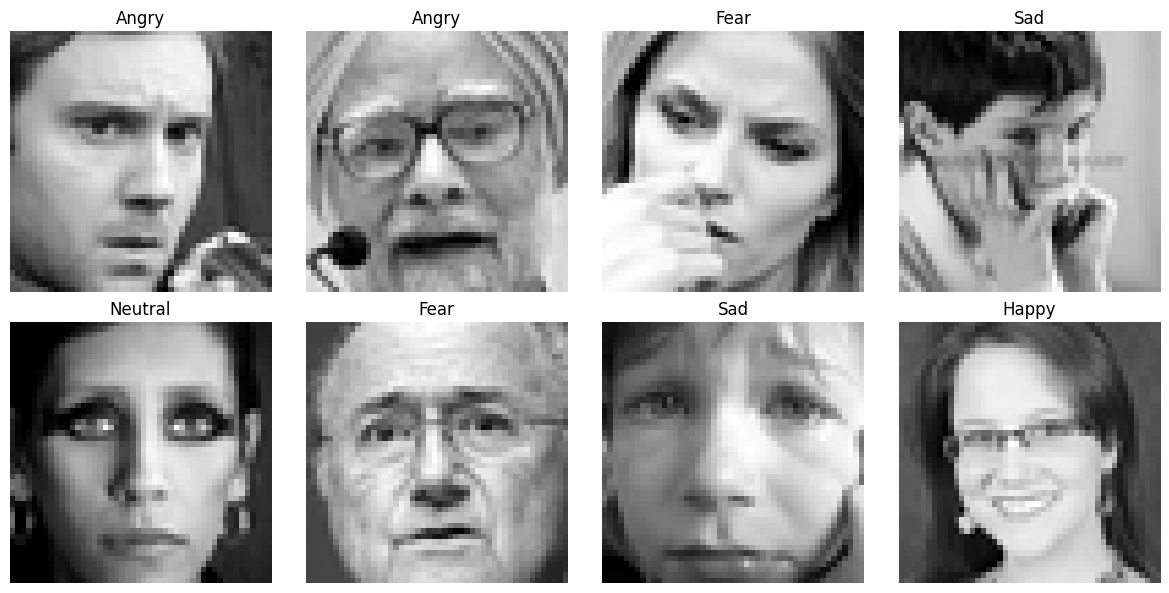

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i in range(8):
    sample = train_df.iloc[i]
    pixels = np.array([int(x) for x in sample['pixels'].split()]).reshape(48, 48)
    axes[i//4, i%4].imshow(pixels, cmap='gray')
    axes[i//4, i%4].set_title(f"{emotion_labels[sample['emotion']]}")
    axes[i//4, i%4].axis('off')
plt.tight_layout()
plt.show()

# **Class Distribution**

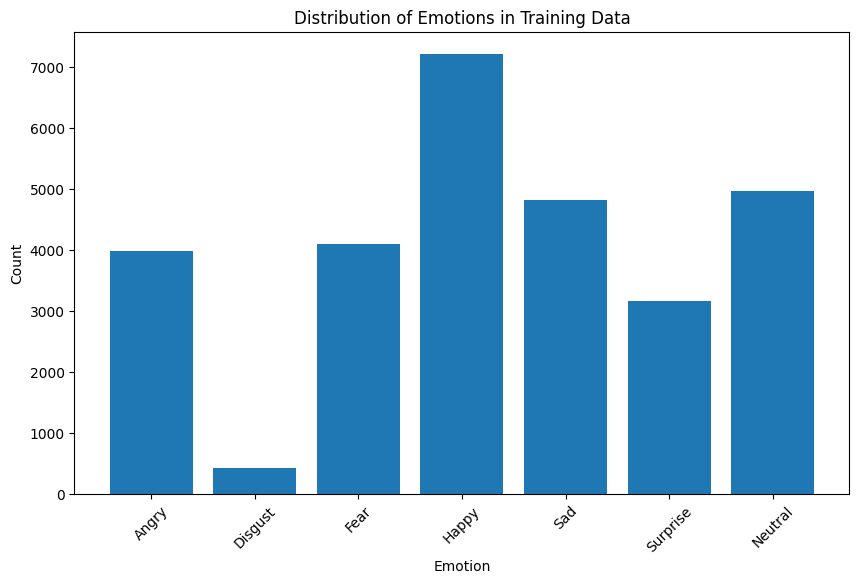

Data exploration complete!
Key observations:
- 48x48 grayscale images
- 7 emotion classes
- Check for class imbalance
- Images are relatively low resolution


In [26]:
plt.figure(figsize=(10, 6))
emotion_counts = train_df['emotion'].value_counts().sort_index()
plt.bar(range(len(emotion_counts)), emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions in Training Data')
plt.xticks(range(len(emotion_labels)), [emotion_labels[i] for i in range(len(emotion_labels))], rotation=45)
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Data exploration complete!")
print("Key observations:")
print("- 48x48 grayscale images")
print("- 7 emotion classes")
print("- Check for class imbalance")
print("- Images are relatively low resolution")


In [27]:
class FERDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        pixels = np.array([int(x) for x in row['pixels'].split()]).reshape(48, 48)
        image = Image.fromarray(pixels.astype('uint8'))

        if self.transform:
            image = self.transform(image)

        emotion = row['emotion']
        return image, emotion

In [28]:
def create_basic_loaders(batch_size=64):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # Split data
    train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['emotion'])

    train_dataset = FERDataset(train_data, transform=transform)
    val_dataset = FERDataset(val_data, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader

print("Setup complete! Ready for experiments.")

Setup complete! Ready for experiments.


In [29]:
wandb.log({
    "class_distribution": wandb.Image("class_distribution.png"),
    "total_samples": len(train_df),
    "num_classes": len(emotion_labels),
    "class_balance": emotion_counts.to_dict()
})

In [30]:
!cp "/content/drive/MyDrive/Colab Notebooks/01_data_exploration_and_setup.ipynb" /content/
